# Leitura e Filtragem

Patient name: Patient2


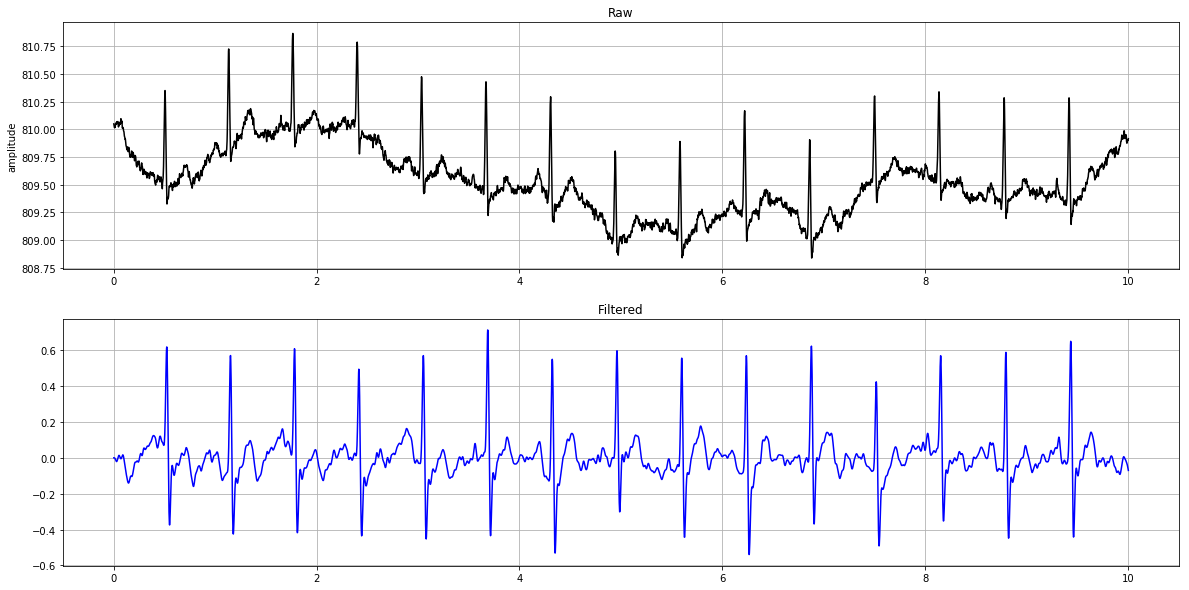

In [48]:
## Bibliotecas ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, lfilter_zi

# Funções ----------------------------------------------------------------------
# Ler csv 
# Copie o arquivo ecg-data com os ecgs para o home onde o Jupyter/Python esta sendo executado
def getExGSignal():

    sRate = 500 # Amostras/s
    ch1, ch2, ch3  = [], [], [],
    
    patientName = str(input("Patient name: "))
    fileDir = "ecg-data/" + patientName + "/signals.csv"

    samples = 1
    with open(fileDir) as dataFile:
        next(dataFile)
        for line in dataFile:
            aux = line.split(';')
            ch1.append(float(aux[0]))
            ch2.append(float(aux[1]))
            ch3.append(float(aux[2]))
           
            samples +=1
        #end-for
    #end-with

    ch1 = ch1[1:5001]
    ch2 = ch2[1:5001]
    ch3 = ch3[1:5001]
 
    samples = 5000
    dataFile.close()

    # Generate X Axis.
    xAxis = np.linspace(0, samples/sRate, samples, endpoint=True)

    return xAxis, ch1, ch2, ch3, samples, sRate, patientName
#end def

# Calcula a função para o Filtro Butterworth 
def butter_bandpass(lowcut, highcut, sRate, order=4):
    nyq = 0.5 * sRate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
#end def

#def butter_bandpass_filter(data, lowcut, highcut, sRate, order=5):
#    b, a = butter_bandpass(lowcut, highcut, sRate, order=order)
#    y = lfilter(b, a, data)
#    return y
##end def

# Aplica o filtro considerando o transiente inicial.
def butter_bandpass_filter_zi(data, lowcut, highcut, sRate, order=4):
    b, a = butter_bandpass(lowcut, highcut, sRate, order=order)
    zi = lfilter_zi(b, a)
    y,zo = lfilter(b, a, data, zi=zi*data[0])
    return y
#end def
   
# Plota os canais

def plotChannels(ax, ch1, ch2, name, stype):
    plt.figure('ECG Signals from: '+name, figsize=(20,10))
    plt.subplot(2,1,1)
    plt.title("Raw")
    plt.ylabel("amplitude")
    plt.plot(ax, ch1, "black")
    plt.grid()

    plt.subplot(2,1,2)
    plt.title("Filtered")
    plt.plot(ax, ch2, "blue")
    plt.grid()
    

    plt.draw()
#end-def


# Main ----------------------------------------------------------------------------------

# Get data
x, c1, c2, c3, samp, sps, patient = getExGSignal()

# Apply bandpass filter into raw signals
lowcut = 1 # 0.5
highcut = 25 # 8
order = 4
c1f = butter_bandpass_filter_zi(c1, lowcut, highcut, sps, order)
c1 = c1[1:5000]
c1f = c1f[1:5000]
x = x[1:5000]


# Plota sinais raw
plotChannels(x, c1, c1f, patient, "Raw")
plt.show()
